## Yolo v3/v5 - Custom Image로 학습시키기

### [1] Custom 이미지 작업  :  이미지와 Annotation
#### object detection annotation tool 구글 검색
- CVAT ,  https://www.cvat.ai/
- Yolo Marker , https://github.com/AlexeyAB/Yolo_mark  , https://ctkim.tistory.com/82
- keymake,  https://keymakr.com/  ,ROTATED BOUNDING BOXES 지원

### CVAT 
 - https://www.cvat.ai/ 에 접속, 구글계정으로 로그인(자동 가입)
 - Task : Creat a new task
 - Task Name : Frozen_30_image을 입력
 - Label 생성   
    'Anna', 'Elsa', 'Olaf' 
 - 업로드할 Image 선택(드래그)  
 - [Submit & Open] 버튼 클릭    
 - Jobs : annotation 작업 수행
 - 좌측 사각형 아이콘 : Draw new rectangle
 - label선택 : [shape]버튼, 단축키 'N'
 - 작업 완료후 [Save] 버튼으로 저장
 - Annotation 파일 다운로드
 : Menu --> Export job dataset--> format을 'YOLO 1.1'로 선택 --> [OK] 버튼
 
 [파일 구조]  
 /frozen/images/train/ : 이미지 파일들    
 /frozen/labels/train/ : annotaion 파일들     
 파일 압축후 Colab으로 업로드 하고 Colab에서 압축해제

### Yolo v3/v5 다운로드 및 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10530, done.
remote: Counting objects: 100% (452/452), done.
remote: Compressing objects: 100% (244/244), done.
remote: Total 10530 (delta 238), reused 393 (delta 207), pack-reused 10078
Receiving objects: 100% (10530/10530), 9.81 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (7037/7037), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00


In [2]:
# 이미지 압축파일(frozen.zip)을 코랩에 업로드한다
from google.colab import files
uploaded = files.upload()

Saving frozen.zip to frozen.zip


In [3]:
!mkdir /content/frozen
!unzip frozen.zip -d /content/frozen

Archive:  frozen.zip
   creating: /content/frozen/images/
   creating: /content/frozen/images/train/
  inflating: /content/frozen/images/train/01.jpg  
  inflating: /content/frozen/images/train/02.jpg  
  inflating: /content/frozen/images/train/03.jpg  
  inflating: /content/frozen/images/train/04.jpg  
  inflating: /content/frozen/images/train/05.jpg  
  inflating: /content/frozen/images/train/06.jpg  
  inflating: /content/frozen/images/train/07.jpg  
  inflating: /content/frozen/images/train/08.jpg  
  inflating: /content/frozen/images/train/09.jpg  
  inflating: /content/frozen/images/train/10.jpg  
  inflating: /content/frozen/images/train/11.jpg  
  inflating: /content/frozen/images/train/12.jpg  
  inflating: /content/frozen/images/train/13.jpg  
  inflating: /content/frozen/images/train/14.jpg  
  inflating: /content/frozen/images/train/15.jpg  
  inflating: /content/frozen/images/train/16.jpg  
  inflating: /content/frozen/images/train/17.jpg  
  inflating: /content/frozen/ima

### Dataset용 yaml 파일을 생성하고 학습 수행

In [4]:
# frozen.yaml 파일을 코랩에 업로드한다
from google.colab import files
uploaded = files.upload()
!cp frozen.yaml /content/frozen/frozen.yaml

Saving frozen.yaml to frozen.yaml


In [ ]:
!ls /content/frozen/ 

frozen.yaml  images  labels  obj.data  obj.names  obj_train_data  train.txt


In [ ]:
!cat /content/frozen/frozen.yaml

train: /content/frozen/images/train/ 
val: /content/frozen/images/train/

# number of classes
nc: 3
# class names
names: [ 'Anna', 'Elsa', 'Olaf' ]


In [5]:
# Google Drive 접근을 위한 Mount 적용.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/drive/My\ Drive/ /mydrive
# !ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir"

mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [ ]:
###  batch size는 8로 정할것. 16으로 설정시 성능이 좋아지지 않음. epoch는 150번으로 설정.
# Colab 약 20~25분 소요
!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 150 --data /content/frozen/frozen.yaml --weights yolov3.pt \
                                     --project=/mydrive/ultra_workdir --name frozen --exist-ok 

2023-04-26 13:31:46.683494: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 13:31:47.506921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov3.pt, cfg=, data=/content/frozen/frozen.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/mydrive/ultra_workdir, name=frozen, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, up

### 단일 이미지 및 Video inference 수행 

In [7]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/frozen/images/train/06.jpg \
                            --weights /mydrive/ultra_workdir/frozen/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/frozen/weights/best.pt'], source=/content/frozen/images/train/06.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv3 🚀 v9.6.0-62-gf288728 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/1 /content/frozen/images/train/06.jpg: 480x640 1 Anna, 1 Elsa, 1 Olaf, 47.9ms
Speed: 0.6ms pre-process, 47.9ms inference, 29.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


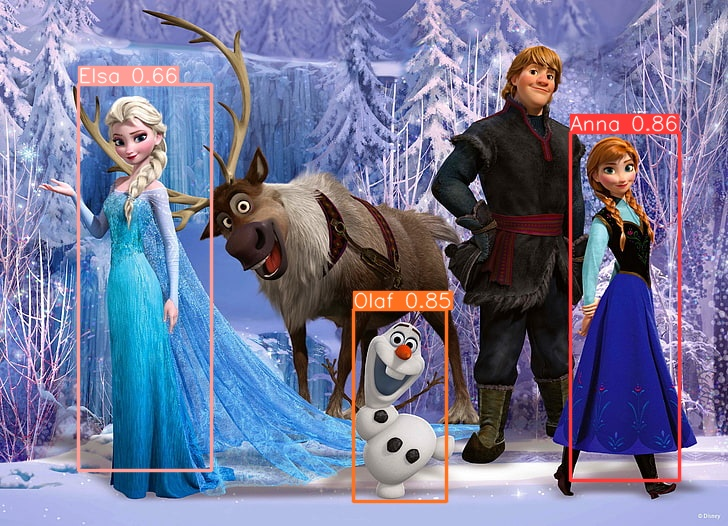

In [8]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/06.jpg', width=800)

In [12]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/frozen/images/train/25.jpg \
                            --weights /mydrive/ultra_workdir/frozen/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/frozen/weights/best.pt'], source=/content/frozen/images/train/25.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv3 🚀 v9.6.0-62-gf288728 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/1 /content/frozen/images/train/25.jpg: 480x640 1 Anna, 1 Elsa, 1 Olaf, 54.0ms
Speed: 0.5ms pre-process, 54.0ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


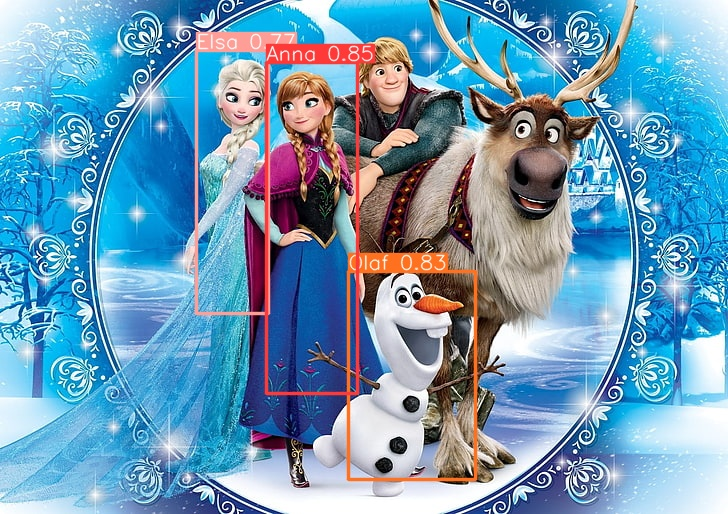

In [13]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/25.jpg', width=800)

In [9]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/frozen/images/train/01.jpg \
                            --weights /mydrive/ultra_workdir/frozen/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/frozen/weights/best.pt'], source=/content/frozen/images/train/01.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv3 🚀 v9.6.0-62-gf288728 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/1 /content/frozen/images/train/01.jpg: 608x640 1 Anna, 1 Olaf, 63.4ms
Speed: 0.6ms pre-process, 63.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


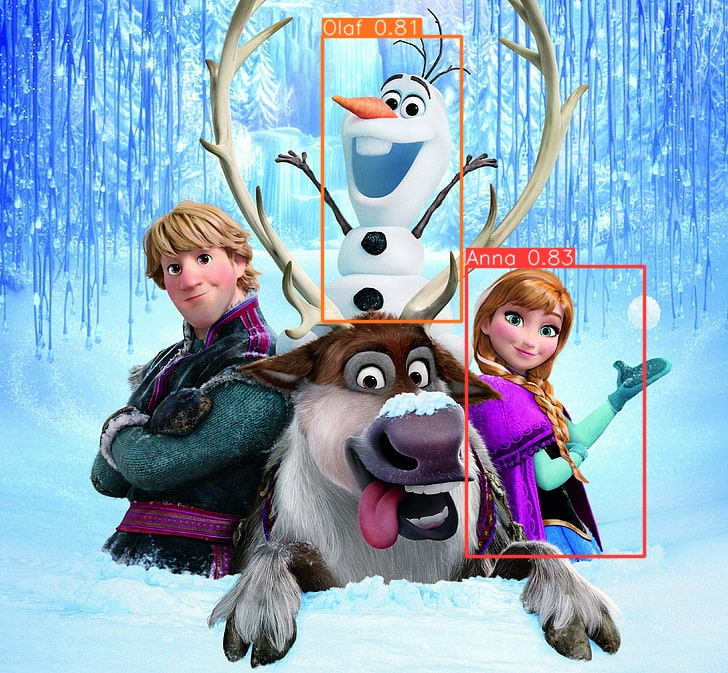

In [10]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/01.jpg', width=800)

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# !cp frozen.mp4 /content/frozen/frozen.mp4 

In [ ]:
# !cd /content/yolov3;python detect.py --source /content/frozen/frozen.mp4 \
#                             --weights /mydrive/ultra_workdir/frozen/weights/best.pt --conf 0.3 \
#                             --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

In [ ]:
!cd /content/yolov3;python detect.py   --weights /mydrive/ultra_workdir/frozen/weights/best.pt --conf 0.3 \
  --project=/content/data/output --name=run_image --exist-ok --line-thickness 2 --source https://www.youtube.com/watch?v=kBZoGaC3xo0

detect: weights=['/mydrive/ultra_workdir/frozen/weights/best.pt'], source=https://www.youtube.com/watch?v=kBZoGaC3xo0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv3 🚀 v9.6.0-62-gf2887289 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

requirements: YOLOv3 requirements "pafy" "youtube_dl==2020.12.2" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https: